 DOMAIN: Healthcare
 
• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slopeS
5. P_radius
6. S_degree
7. Class

• PROJECT OBJECTIVE:

Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.


1. Import and warehouse data:

 • Import all the given datasets and explore shape and size of each. 

 • Merge all datasets onto one and explore final shape and size.
 

2. Data cleansing:

 • Explore and if required correct the datatypes of each attribute

 • Explore for null values in the attributes and if required drop or impute values.
 

3. Data analysis & visualisation:

 • Perform detailed statistical analysis on the data.

 • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
 analysis.
 

4. Data pre-processing:

 • Segregate predictors vs target attributes

 • Perform normalisation or scaling if required.

 • Check for target balancing. Add your comments. 

 • Perform train-test split.


5. Model training, testing and tuning:

 • Design and train a KNN classifier.

 • Display the classification accuracies for train and test data.

 • Display and explain the classification report in detail.

 • Automate the task of finding best values of K for KNN.

 • Apply all the possible tuning techniques to train the best model for the given data. Select the final best    trained model with your comments for selecting this model.


6. Conclusion and improvisation:

 • Write your conclusion on the results.

 • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data    points collected by the research team to perform a better data analysis in future.

### Import and warehouse data:

In [1]:
# This is used to plot inline
%matplotlib inline

# Importing all the required modules
import pandas as pd
import numpy as np

# seaborn is a plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# scikit learn for ml algorithms
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# To find the cross validation score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold

# Using grid search and confusion matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading that data 
# dataset one
df1 = pd.read_csv('Part1 - Type_H.csv')

# dataset two
df2 = pd.read_csv('Part1 - Type_S.csv')


In [3]:
# Print the first 5 rows of the dataframe.

df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [4]:
# print last five rows of the dataset

df1.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Type_H
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Type_H


In [5]:
# print basic information about dataset
# gives information about the data types,columns, null value counts, memory usage etc

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [6]:
# column details 

df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [7]:
# size of the first data set

df1.shape

(60, 7)

In [8]:
# print first five rows of dataset 2

df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [9]:
# shape of the dataset 2

df2.shape

(150, 7)

In [10]:
# basic information about dataset 2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [11]:
# last five rows of dataset two

df2.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [12]:
# merge two dataset

data = pd.concat([df1, df2], ignore_index=True)

In [13]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [14]:
data.shape

(210, 7)

In [15]:
data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


There are 7 columns(attributes) and 210 records (rows)

### Data Cleansing

In [16]:
# Explore and if required correct the datatypes of each attribute

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  210 non-null    float64
 1   P_tilt       210 non-null    float64
 2   L_angle      210 non-null    float64
 3   S_slope      210 non-null    float64
 4   P_radius     210 non-null    float64
 5   S_Degree     210 non-null    float64
 6   Class        210 non-null    object 
dtypes: float64(6), object(1)
memory usage: 11.6+ KB


All the Attributes are of numeric data type and class is a categorical type which will be taken care of later.

In [17]:
# categorical variable

data.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Type_H,37,37,37,37,37,37
Type_S,133,133,133,133,133,133
tp_s,17,17,17,17,17,17
type_h,23,23,23,23,23,23


In [18]:
# Correct labels tp_s and type_h respectively 

data['Class'] = data['Class'].str.replace('tp_s','Type_S')
data['Class'] = data['Class'].str.replace('type_h','Type_H')

In [19]:
data["Class"].value_counts()

Type_S    150
Type_H     60
Name: Class, dtype: int64

In [20]:
# check for null values

def missing_check(data):
    
    total = data.isnull().sum().sort_values(ascending=False)                           # total number of null values
    
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])            # putting the above two together
    
    return missing_data                                                                      # return the dataframe

missing_check(data)

,Total,Percent
P_incidence,0,0.0
P_tilt,0,0.0
L_angle,0,0.0
S_slope,0,0.0
P_radius,0,0.0
S_Degree,0,0.0
Class,0,0.0


There are no null values.

#### Encode the categoical variable

we use LabelEncoder from sklearn which encode target labels with value between 0 and n_classes-1

In [21]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
class_encoded=le.fit_transform(data['Class'])
print(class_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
data['Class']= class_encoded
data['Class'].value_counts()

1    150
0     60
Name: Class, dtype: int64

### Data Preparation 

##### Descriptive analytics

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,210.0,64.692562,17.662129,26.147921,50.102507,65.274888,77.593672,129.834041
P_tilt,210.0,19.791111,10.515871,-6.554948,13.048130,18.798899,24.815515,49.431864
L_angle,210.0,55.925370,19.669471,14.000000,41.116964,56.150000,68.102805,125.742385
S_slope,210.0,44.901450,14.515560,13.366931,34.380345,44.639597,55.146868,121.429566
P_radius,210.0,115.077713,14.090605,70.082575,107.309280,115.650323,123.133365,163.071041
S_Degree,210.0,37.777705,40.696741,-10.675871,7.263227,31.946516,55.371614,418.543082
Class,210.0,0.714286,0.452833,0.000000,0.000000,1.000000,1.000000,1.000000


Scaling 

All the columns are scaled since KNN uses distance metric

In [24]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()
pd.DataFrame(rob_scaler.fit_transform(data.drop(["Class"],axis = 1),),
        columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'])

data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


##### Univariate Analysis

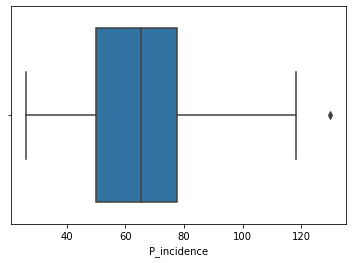

In [25]:
# lets plot attribute P_incidence

sns.boxplot(data['P_incidence'])

Median is 65 . outliers are present with values greater than 120.

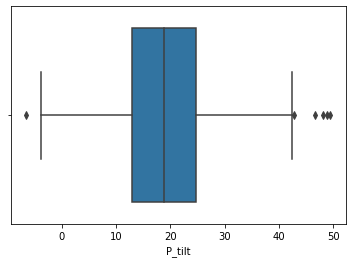

In [26]:
# plot P_tilt
sns.boxplot(data['P_tilt'])

Median is 19 and outliers are present less than the lower fence and greater than upper fence.

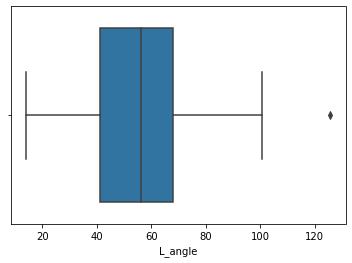

In [27]:
# plot L_angle

sns.boxplot(data['L_angle'])

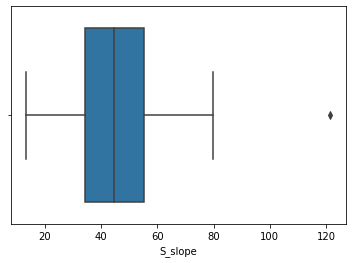

In [28]:
# plot S_slope
sns.boxplot(data['S_slope'])

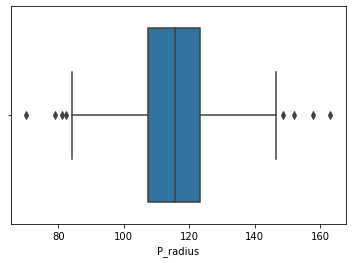

In [29]:
# plot P_radius
sns.boxplot(data['P_radius'])

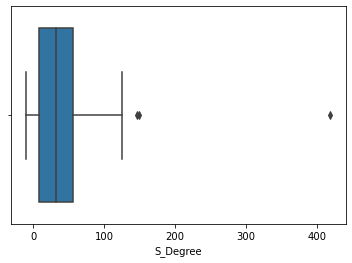

In [30]:
# plot S_Degree
sns.boxplot(data['S_Degree'])

Dataset comprises more number of outliers.

Plot Class attribute and see disribution of data for each class label

Text(0.5, 1.0, 'Class Distributions \n (0: Type_H || 1: Type_S)')

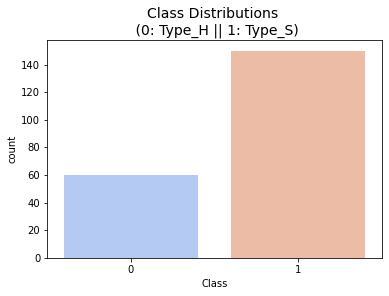

In [31]:
sns.countplot('Class', data=data, palette='coolwarm')
plt.title('Class Distributions \n (0: Type_H || 1: Type_S)', fontsize=14)

#### Distributions:

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.
The above graph shows that the data is biased towards datapoints having outcome value Type_S with 150. The number of Type_S is almost twice the number of Type_H class with 60. 

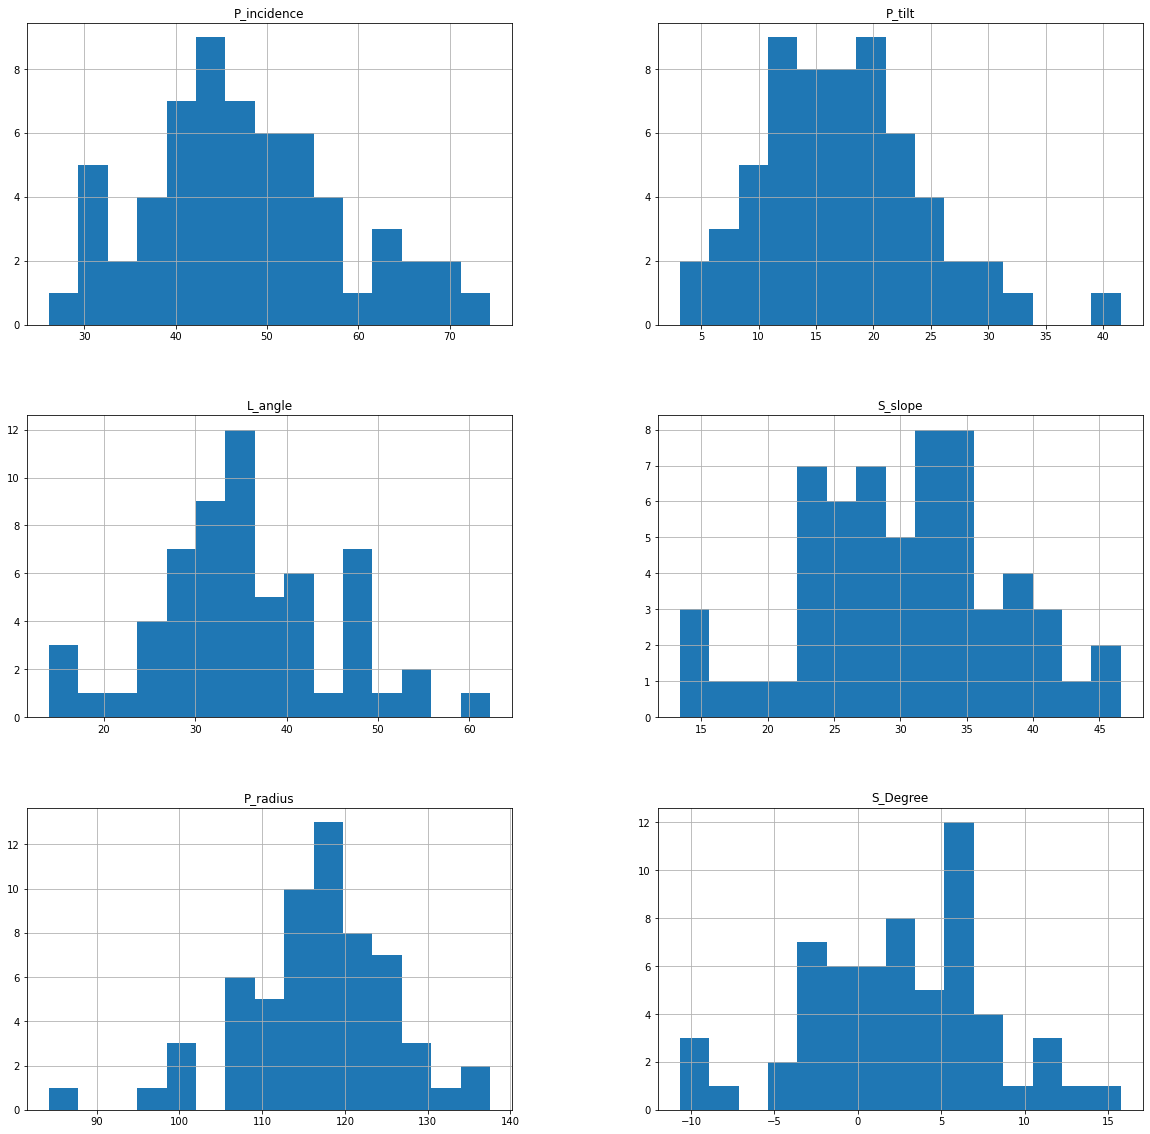

In [32]:
df1.hist(bins=15, figsize=(20,20))

plt.show()

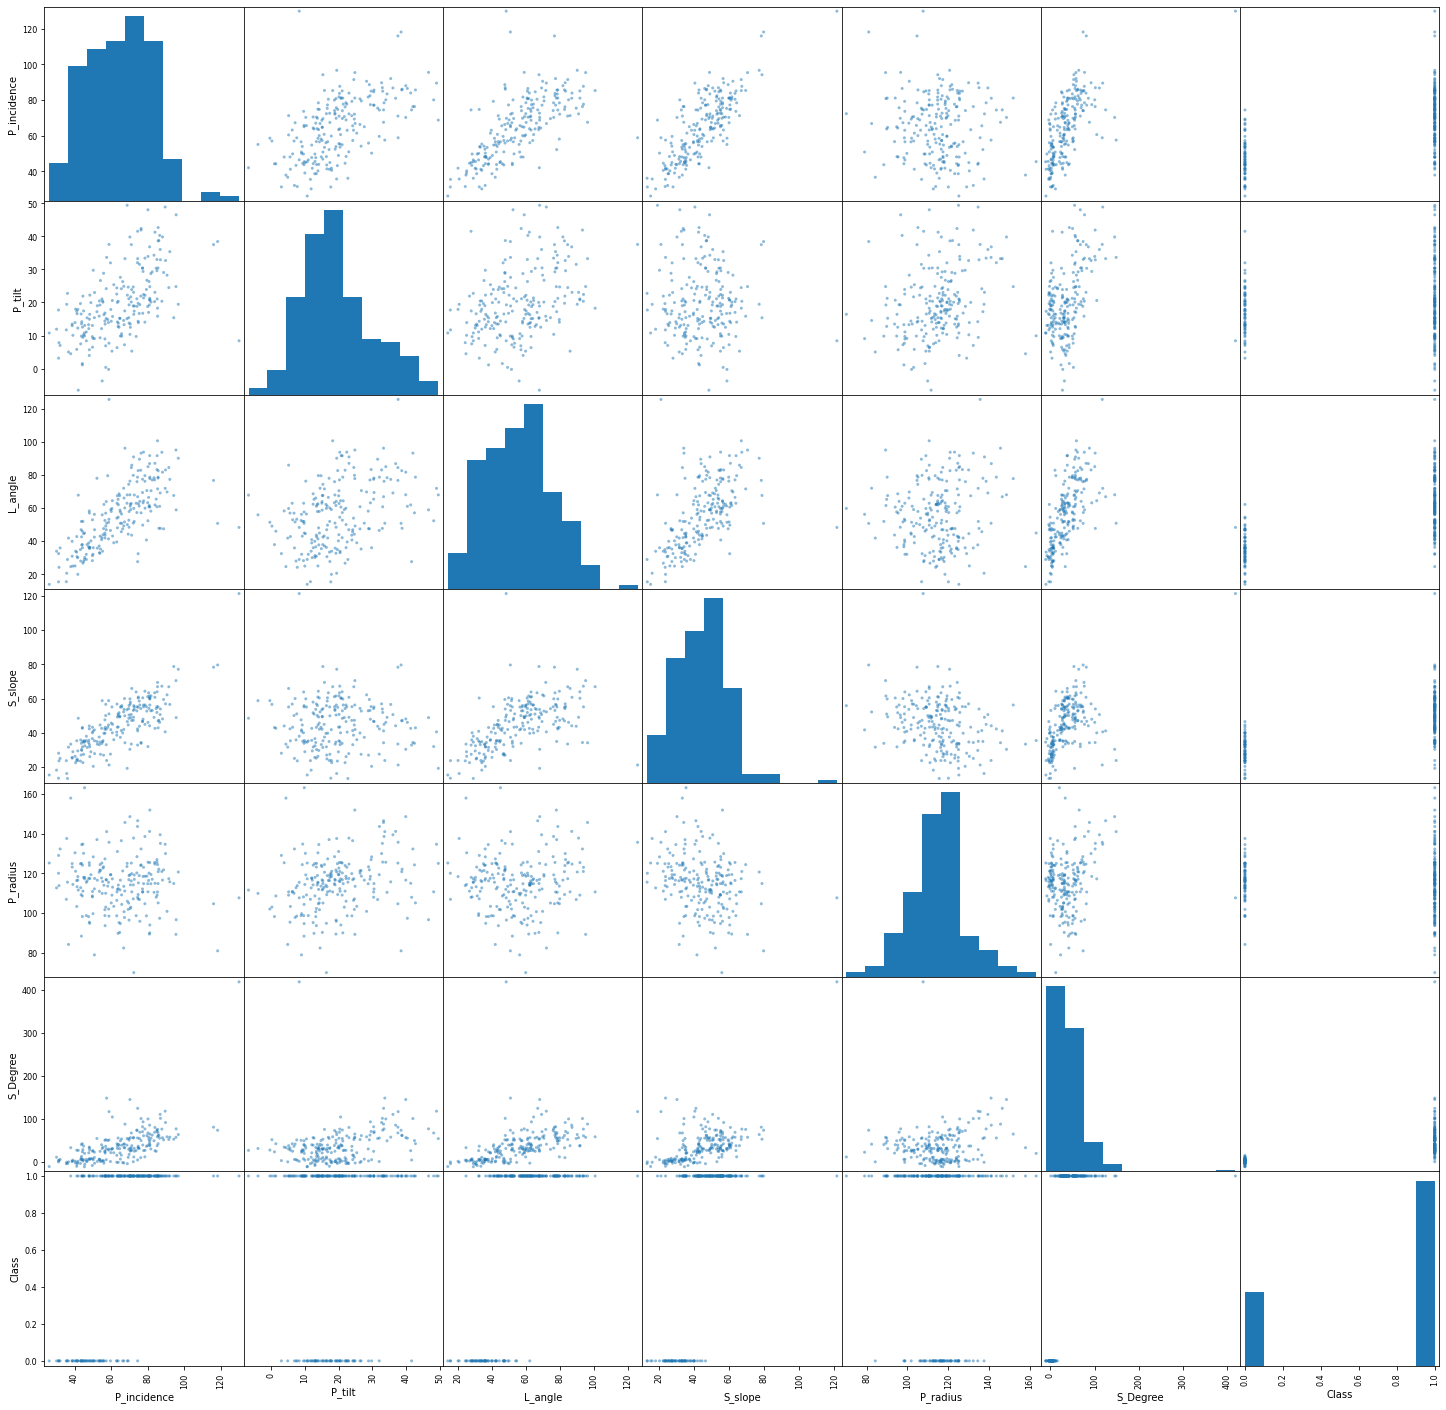

In [33]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

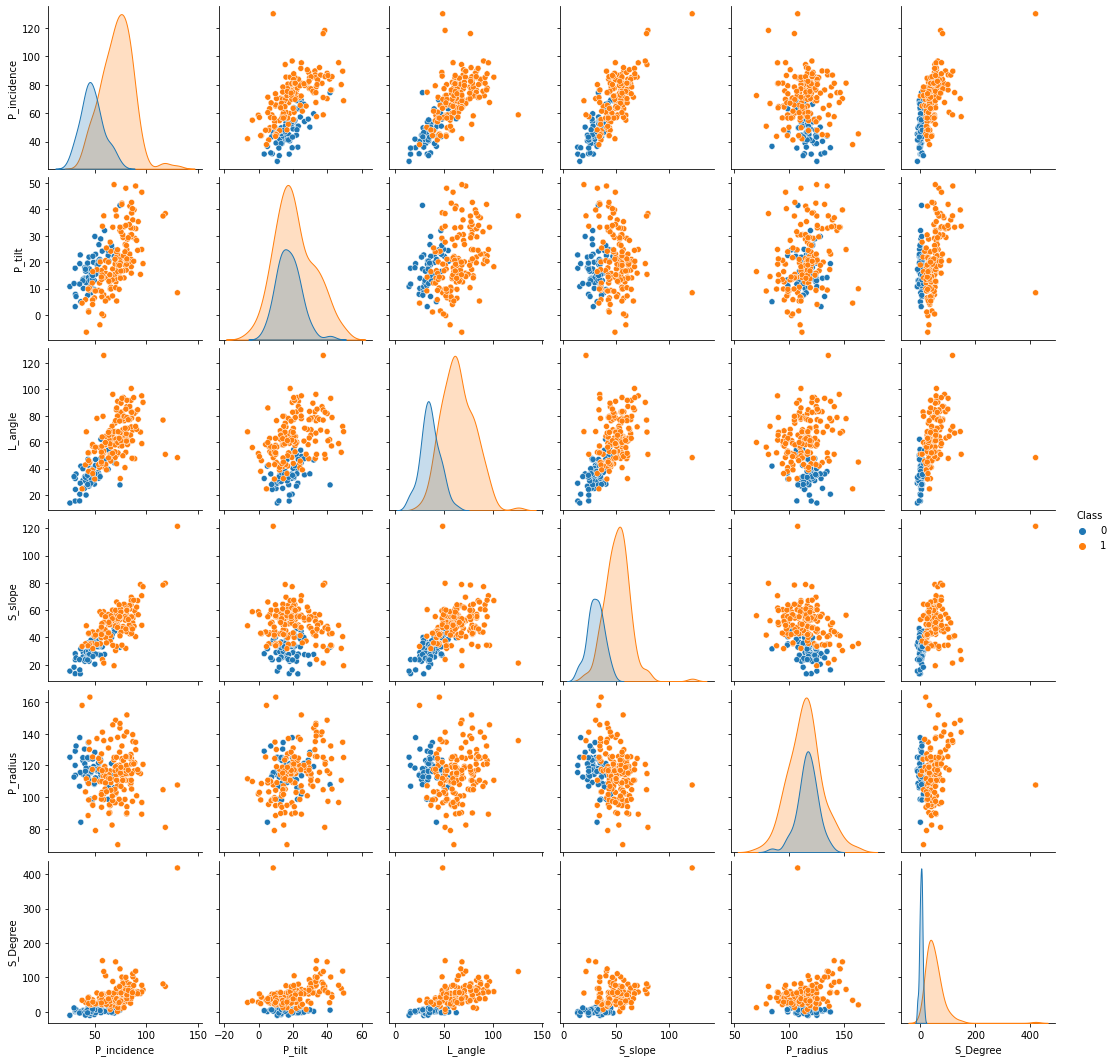

In [34]:
p = sns.pairplot(data , hue = 'Class')

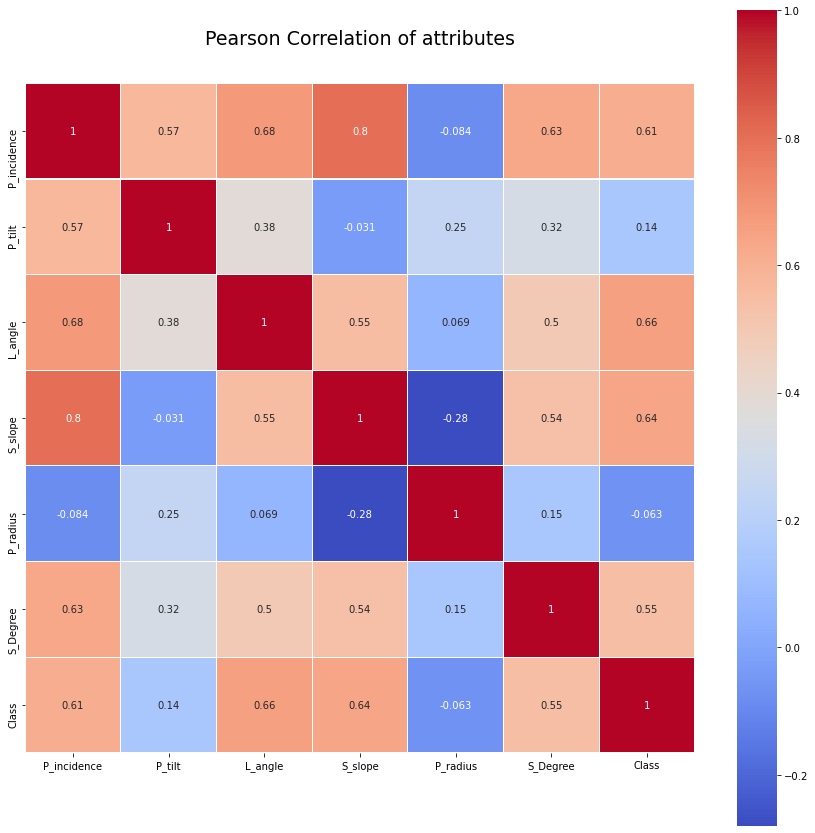

In [35]:
 # Correlation matrix
#colormap = plt.cm.icefire
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(data.corr(),cmap='coolwarm' ,linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)


High corrlation in P_incidence and S_slope (Correlation coefficient of 0.61 and 0.64)

Moderate correlation S_Degree and L_angle (Correlation coefficient of 0.55 and 0.66)

Least correlation between P_tilt and P_radius indicates that we may have to drop these predictors, before we build our model.

In [36]:
df = data.drop(columns = ['P_tilt', 'P_radius'])

#### Split dataset(Oroginal)
Lets split the data into training and test set using train_test_split function from sklearn. 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Type_H', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Type_S', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state= 42 ,shuffle = True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Type_H 28.57 % of the dataset
Type_S 71.43 % of the dataset
Train: [  0   2   3   4   5   6   7   8   9  10  12  13  15  17  19  20  21  22
  23  24  25  27  28  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  46  47  48  49  50  51  53  54  55  56  57  60  61  62  63  64  68
  69  70  71  72  73  75  76  78  79  81  82  83  84  87  89  90  91  92
  93  95  97  99 100 101 102 103 104 105 106 107 108 109 112 113 114 115
 116 117 118 119 120 121 124 125 126 127 128 129 130 131 133 134 135 136
 139 140 141 144 145 146 147 149 150 151 154 155 156 157 158 159 160 161
 162 163 164 165 166 168 169 170 171 172 173 174 175 176 178 179 180 181
 182 183 185 187 188 189 190 191 192 193 194 195 196 197 198 199 200 202
 203 204 205 207 208 209] Test: [  1  11  14  16  18  26  29  44  45  52  58  59  65  66  67  74  77  80
  85  86  88  94  96  98 110 111 122 123 132 137 138 142 143 148 152 153
 167 177 184 186 201 206]
Train: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  16  17 

#### Random Undersampling

We implement 'Random Under Sampling' in which we remove data in order to have a more balanced dataset and thus avoiding our model to overfit

1:Determine how imbalanced is our class by using value_counts()

2: we determine how many instances are Type_s = 1 and Type_H = 0
and we bring down both to same ration of 50:50 ,which will be equivalent to 60 Type_S and 60 Type_H

3: Then shuffle the data to see if our model can maintain accuracy.

In [59]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
TypeS_df = df.loc[df['Class'] == 1][:60]
TypeH_df = df.loc[df['Class'] == 0]

normal_distributed_df = pd.concat([TypeS_df, TypeH_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,P_incidence,L_angle,S_slope,S_Degree,Class
205,80.111572,85.101608,46.169139,100.292107,1
209,48.259920,36.329137,31.842457,28.343799,1
140,69.563486,74.438497,54.162347,29.701211,1
117,86.041280,47.871405,47.290610,61.988277,1
88,56.605771,42.000000,39.805571,24.018575,1


#### Equally Distributing and Correlating:
Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


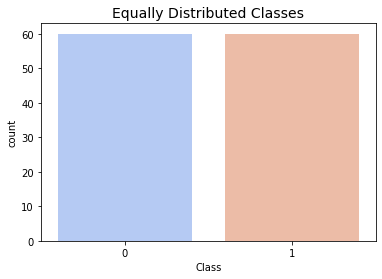

In [60]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette='coolwarm')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

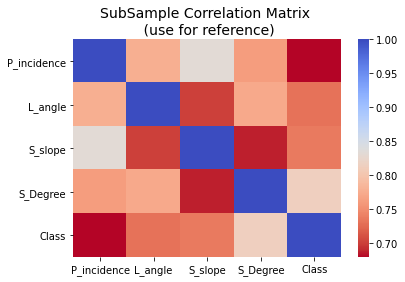

In [61]:
# correlation matrix of balanced distribution

sub_sample_corr = new_df.corr()
ax2 = sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

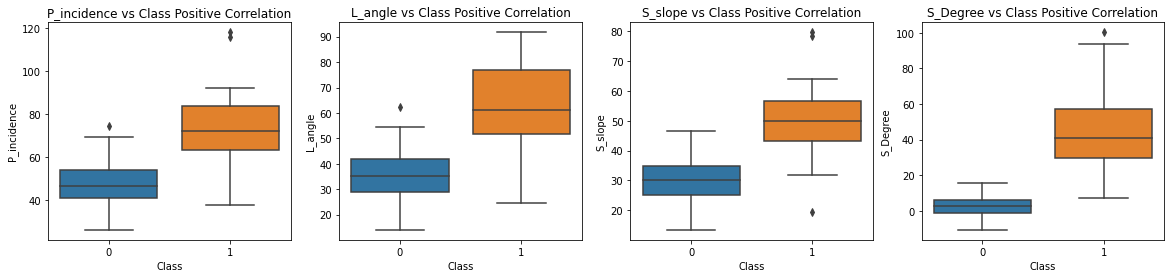

In [62]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="P_incidence", data=new_df ,ax=axes[0])
axes[0].set_title('P_incidence vs Class Positive Correlation')

sns.boxplot(x="Class", y="L_angle", data=new_df,ax=axes[1])
axes[1].set_title('L_angle vs Class Positive Correlation')


sns.boxplot(x="Class", y="S_slope", data=new_df,ax=axes[2])
axes[2].set_title('S_slope vs Class Positive Correlation')


sns.boxplot(x="Class", y="S_Degree", data=new_df,ax=axes[3])
axes[3].set_title('S_Degree vs Class Positive Correlation')

plt.show()

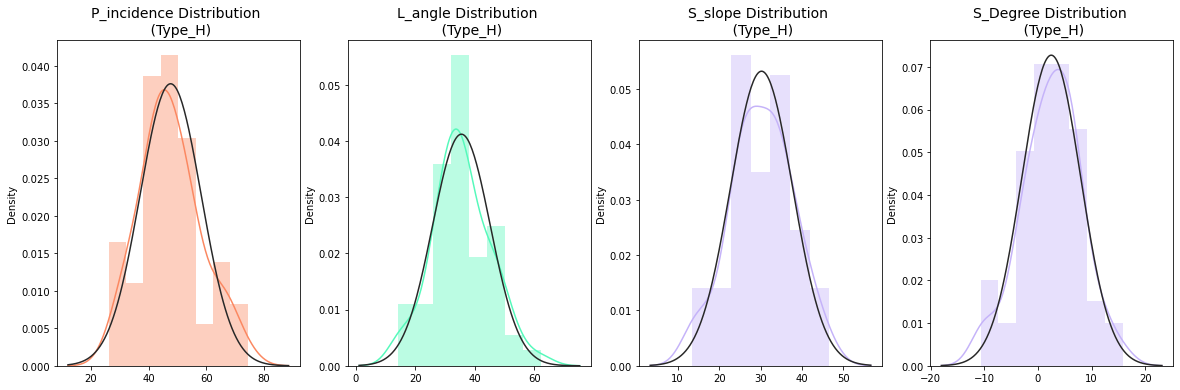

In [63]:
from scipy.stats import norm

f, (ax1, ax2, ax3 ,ax4) = plt.subplots(1,4, figsize=(20, 6))

p_incidence_dist = new_df['P_incidence'].loc[new_df['Class'] == 0].values
sns.distplot(p_incidence_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('P_incidence Distribution \n (Type_H)', fontsize=14)

Langle_dist = new_df['L_angle'].loc[new_df['Class'] == 0].values
sns.distplot(Langle_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('L_angle Distribution \n (Type_H)', fontsize=14)


S_slope_dist = new_df['S_slope'].loc[new_df['Class'] == 0].values
sns.distplot(S_slope_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('S_slope Distribution \n (Type_H)', fontsize=14)

S_Degree_dist = new_df['S_Degree'].loc[new_df['Class'] == 0].values
sns.distplot(S_Degree_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('S_Degree Distribution \n (Type_H)', fontsize=14)


plt.show()

In [64]:
# Undersampling before cross validating 

X = new_df.drop('Class' , axis=1)
y = new_df['Class']

In [65]:
# Data is already scaled and we should split into training and test sets

X_train , X_test ,y_train ,y_test = train_test_split(X ,y , test_size = 0.3 , random_state = 40)

In [66]:
# convert values into array 

X_train = X_train.values
X_test= X_test.values
y_train= y_train.values
y_test= y_test.values

In [67]:
# automate task of finding k

k = (np.floor(np.sqrt(len(X_train)/2))).astype(int)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=6)

In [68]:
# cross validation

training_score = cross_val_score(knn ,X_train ,y_train , cv =3)
print("KNN has a training score of" , round(training_score.mean() ,2)*100 ,"% accuracy")

KNN has a training score of 96.0 % accuracy


In [69]:
# Use GridSearchCV to find the best parameters.

from sklearn.model_selection import GridSearchCV

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(knn, knears_params)
grid_knears.fit(X_train, y_train)

# KNN best estimator
knears_neighbors = grid_knears.best_estimator_

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('K-nearest Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')



K-nearest Neighbors Cross Validation Score 98.82%


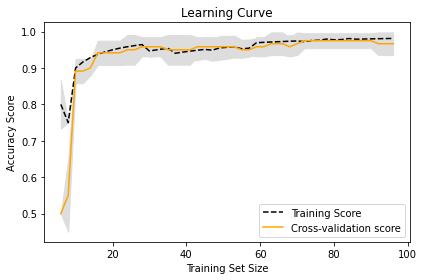

In [70]:
# Lets plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
       knn, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01 ,1.0 ,50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes , train_mean ,'--' , color="black" , label = "Training Score")
plt.plot(train_sizes, test_mean, color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


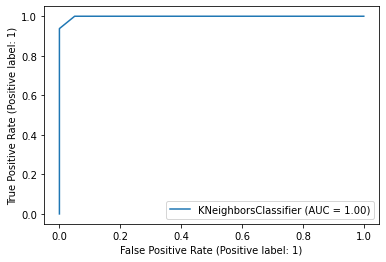

In [71]:
# plot roc 
metrics.plot_roc_curve(knn, X_test, y_test)  
plt.show()

In [72]:
yPredicted = knn.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, yPredicted)
cm

array([[20,  0],
       [ 1, 15]])

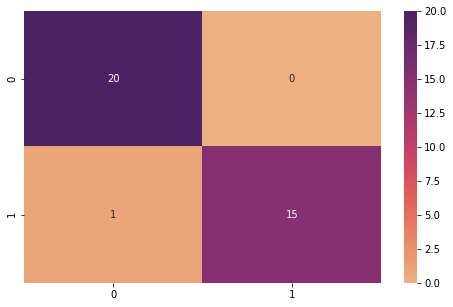

In [73]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="flare")

In [74]:
# summarize the fit of the model
print(metrics.classification_report(y_test, yPredicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.94      0.97        16

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Perfomance Metrices

In [75]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [76]:
# Model evaluation 

print('The accuracy of the model: TP+TN/(TP+TN+FP+FN) =',(TP+TN)/float(TP+TN+FP+FN),'\n')

print('The Missclassification: 1-Accuracy =', 1-((TP+TN)/float(TP+TN+FP+FN)),'\n')

print('Sensitivity or True Positive Rate: TP/(TP+FN) =',TP/float(TP+FN),'\n')

print('Specificity or True Negative Rate: TN/(TN+FP) =',TN/float(TN+FP),'\n')

print('Positive Predictive value: TP/(TP+FP) =',TP/float(TP+FP),'\n')

print('Negative predictive Value: TN/(TN+FN) =',TN/float(TN+FN),'\n')



The accuracy of the model: TP+TN/(TP+TN+FP+FN) = 0.9722222222222222 

The Missclassification: 1-Accuracy = 0.02777777777777779 

Sensitivity or True Positive Rate: TP/(TP+FN) = 0.9375 

Specificity or True Negative Rate: TN/(TN+FP) = 1.0 

Positive Predictive value: TP/(TP+FP) = 1.0 

Negative predictive Value: TN/(TN+FN) = 0.9523809523809523 

